#House Pricing Problem - Regression

Description:
A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity. Can you overcome these obstacles & build a decent predictive model?

Acknowledgement:
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.
Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

Objective:
Understand the Dataset & cleanup (if required).
Build Regression models to predict the sales w.r.t a single & multiple feature.
Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

price: Price of the Houses

area: Area of a House

bedrooms: Number of House Bedrooms

bathrooms: Number of Bathrooms

stories: Number of House Stories

mainroad: Weather connected to Main Road

guestroom: Weather has a guest room

basement: Weather has a basement

hotwaterheating: Weather has a hotwater heater

airconditioning: Weather has an airconditioning

prefarea: Prefarea of the House

furnishingstatus: Furnishing status of the House

parking: Number of House Parkings

YearSold: year of sold of the house

YearBuilt: year of built of the house

#Exploratory Data Analysis

In [ ]:
## Data Analysis Phase
## MAin aim is to understand more about the data

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
dataset=pd.read_csv('/content/Housing (1).csv')

## print shape of dataset with rows and columns
print(dataset.shape)

(545, 15)


In [ ]:
## print the top5 records
dataset.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,YearSold,YearBuilt
540,1820000,3000,2.0,1.0,1,yes,no,yes,no,no,2.0,no,unfurnished,2008,1914
541,1767150,2400,3.0,1.0,1,no,no,no,no,no,0.0,no,semi-furnished,2008,1913
542,1750000,3620,2.0,1.0,1,yes,no,no,no,no,0.0,no,unfurnished,2008,1899
543,1750000,2910,3.0,1.0,1,no,no,no,no,no,0.0,no,furnished,2008,1892
544,1750000,3850,NaN,1.0,2,yes,no,no,no,no,0.0,no,unfurnished,2008,1895


##Data Summary

In [ ]:
# Get information about the dataset (data types, non-null counts, memory usage, etc.)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          543 non-null    float64
 3   bathrooms         542 non-null    float64
 4   stories           545 non-null    int64  
 5   mainroad          544 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          544 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           540 non-null    float64
 11  prefarea          545 non-null    object 
 12  furnishingstatus  544 non-null    object 
 13  YearSold          545 non-null    int64  
 14  YearBuilt         545 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 64.0+ KB


In [ ]:
# Generate summary statistics for numerical columns
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking,YearSold,YearBuilt
count,5.450000e+02,545.000000,543.000000,542.000000,545.000000,540.000000,545.000000,545.000000
mean,4.766729e+06,5389.073394,2.974217,1.287823,1.803670,0.703704,2009.168807,1948.500917
std,1.870440e+06,5256.617792,0.758274,0.507066,0.868138,0.868531,0.636612,24.366015
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,2008.000000,1892.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,2009.000000,1930.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,2009.000000,1945.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,2010.000000,1965.000000
max,1.330000e+07,112900.000000,7.000000,4.000000,4.000000,3.000000,2010.000000,2009.000000


In [ ]:
# Check for missing values in the dataset
dataset.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,YearSold,YearBuilt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


##Identify Missing Values

In [ ]:
## Here we will check the percentage of nan values present in each feature
## Make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>0]

## Print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4), '%   missing values')

bedrooms 0.0037 %   missing values
bathrooms 0.0055 %   missing values
mainroad 0.0018 %   missing values
basement 0.0018 %   missing values
parking 0.0092 %   missing values
furnishingstatus 0.0018 %   missing values


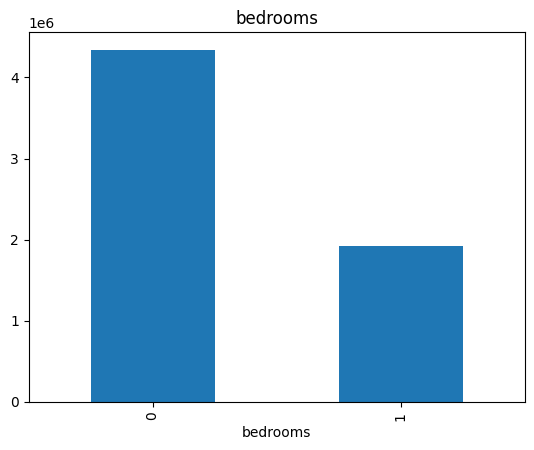

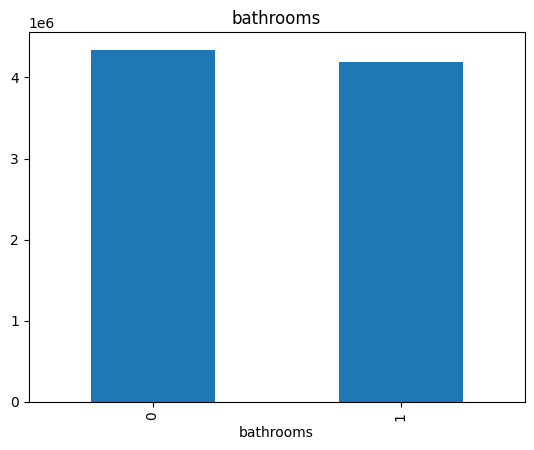

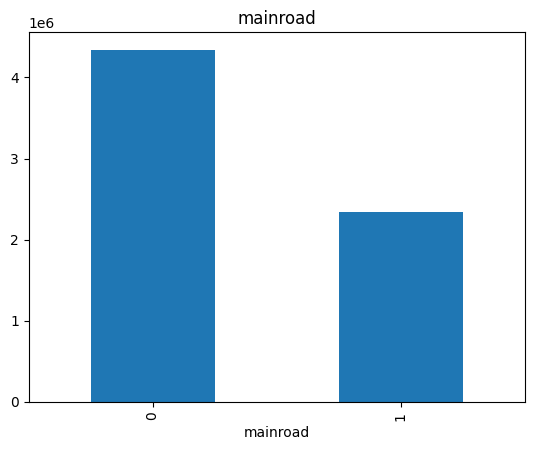

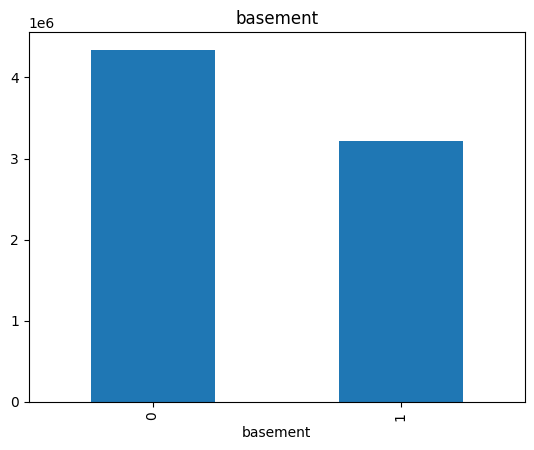

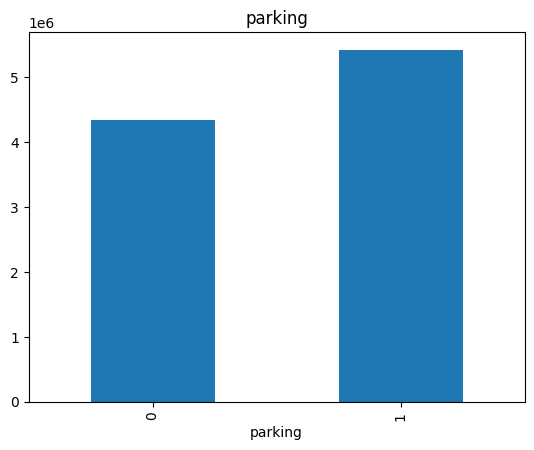

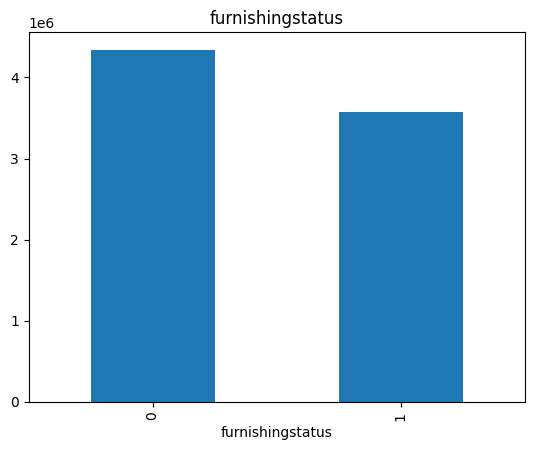

In [ ]:
##Visualize Missing Data
# Visualize the relationship between missing values and the target variable (price)
for feature in features_with_na:
    data = dataset.copy()

    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    # let's calculate the mean pice where the information is missing or present
    data.groupby(feature)['price'].median().plot.bar()
    plt.title(feature)
    plt.show()

When you observe a **significant difference in bar heights** between 1 and 0, it implies that the missingness of that feature is related to variations in the 'price.'
For example, if the bar for 1 (missing) is much shorter than the bar for 0 (not missing), it suggests that the absence of that feature is associated with lower 'price,' or the presence of that feature is associated with higher 'price.'
In this case, the missingness of these features appears to have an impact on the 'price,' and they might be relevant for the prediction model.

When you see bars for both 1 (missing) and 0 (not missing) a**t similar heights**, it suggests that there is no significant difference in the median 'price' for records where the particular feature is missing (1) and where it is not missing (0).
This indicates that the missing values in these features may not have a strong influence on the 'price.' In other words, the missingness of these features does not seem to correlate strongly with the target variable.

##Identify Numerical Variables

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# Display the first few records of numerical variables
dataset[numerical_features].head()

Number of numerical variables:  8


,price,area,bedrooms,bathrooms,stories,parking,YearSold,YearBuilt
0,13300000,7420,4.0,2.0,3,2.0,2010,2003
1,12250000,8960,4.0,4.0,4,3.0,2010,2004
2,12250000,9960,3.0,2.0,2,2.0,2010,2007
3,12215000,7500,4.0,2.0,2,3.0,2010,2002
4,11410000,7420,4.0,1.0,1,2.0,2010,2002


Temporal features in a dataset typically refer to variables or attributes related to time or dates. These features capture information about specific points in time or time intervals.

In this dataset, YearSold and YearBuilt are temporal features.

##Identify Temporal Variables (year)

In [ ]:
# List of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Year' in feature]

year_feature

['YearSold', 'YearBuilt']

In [ ]:
# Explore the content of these year variables
for feature in year_feature:
    print(feature, dataset[feature].unique())

YearSold [2010 2009 2008]
YearBuilt [2003 2004 2007 2002 2009 2006 2001 2000 1990 1999 1997 1987 1995 1992
 1980 1978 1988 1991 1994 1982 1983 1971 1985 1979 1977 1972 1969 1960
 1966 1963 1976 1962 1964 1952 1949 1993 1970 1961 1965 1967 1968 1986
 1959 1958 1973 1974 1932 1954 1955 1956 1957 1975 1950 1951 1953 1944
 1943 1942 1941 1948 1947 1945 1940 1946 1939 1938 1900 1925 1915 1934
 1920 1929 1930 1931 1910 1924 1902 1923 1928 1935 1916 1918 1919 1917
 1907 1905 1914 1913 1899 1892 1895]


Text(0.5, 1.0, 'House Price vs YearSold')

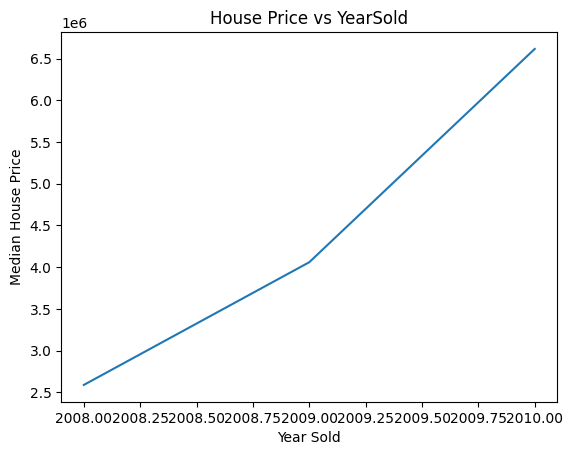

In [ ]:
## Lets analyze the Temporal Datetime Variables
# Analyze the relationship between the year the house was sold and the sales price

dataset.groupby('YearSold')['price'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

The upward-sloping line indicates that, on average, house prices have increased over the years. This is a common trend in real estate markets and is often a result of factors like inflation, economic growth, and increasing demand for housing

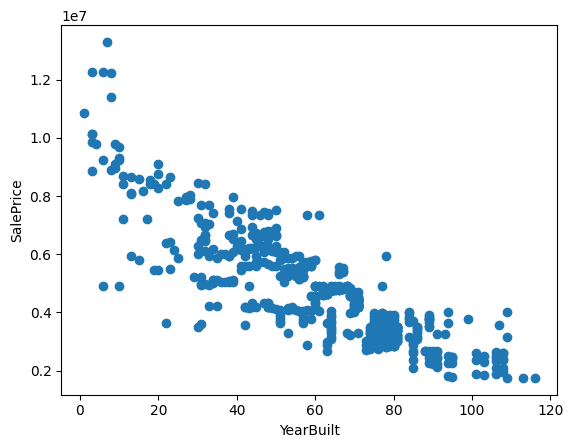

In [ ]:
## Compare the difference between year variables and SalePrice

for feature in year_feature:
    if feature!='YearSold':
        data=dataset.copy()
        ## We will capture the difference between year built variable and year the house was sold for
        data[feature]=data['YearSold']-data[feature]

        plt.scatter(data[feature],data['price'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

##Identify Discrete and Continuous Variables

**Discrete** variables that can only take specific, distinct values. They often represent counts of items and are typically whole numbers.
Ex. number of students in a classroom, the count of customer complaints, or ratings.

**Continuous** variables that can take on any value within a certain range. Continuous variables are typically measured and can have decimal or fractional values.
Ex. height, weight, temperature, or distance.

In [ ]:
# List of discrete variables (few unique values)
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 4


In [ ]:
discrete_feature

['bedrooms', 'bathrooms', 'stories', 'parking']

In [ ]:
dataset[discrete_feature].head()

,bedrooms,bathrooms,stories,parking
0,4.0,2.0,3,2.0
1,4.0,4.0,4,3.0
2,3.0,2.0,2,2.0
3,4.0,2.0,2,3.0
4,4.0,1.0,1,2.0


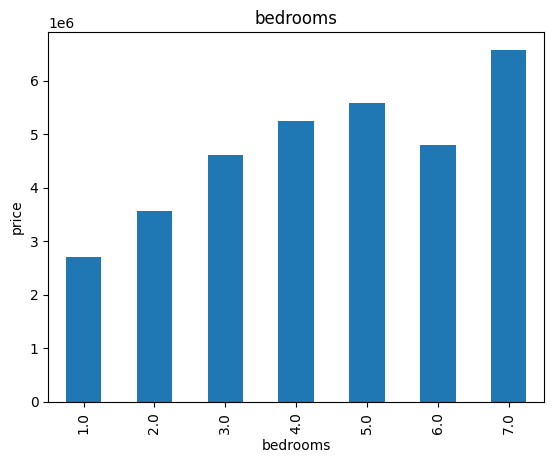

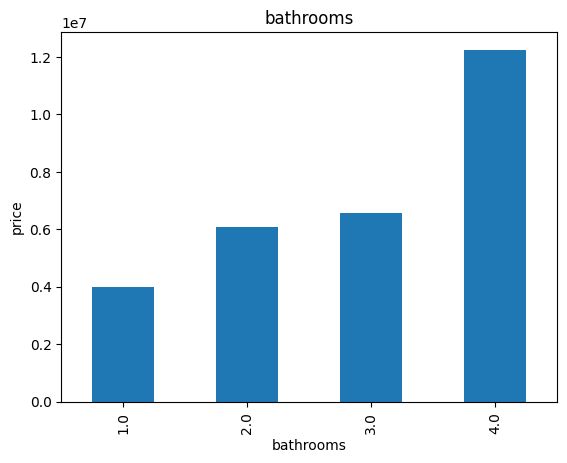

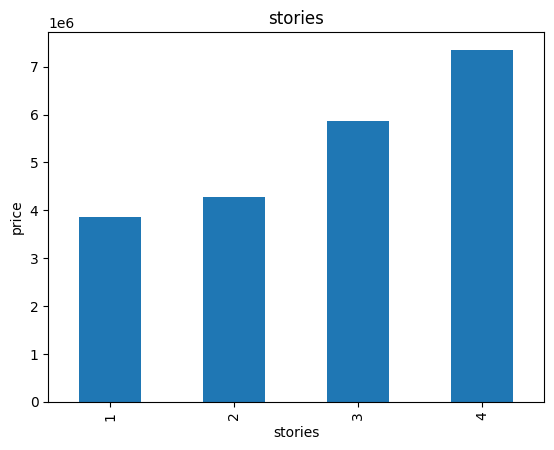

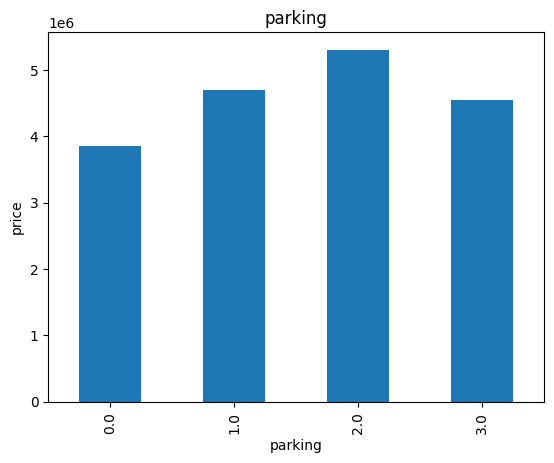

In [ ]:
## Visualize the relationship between discrete variables and price

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

have strong influence
-- larger properties with more bathrooms, bedrooms, parkings or stories tend to have higher median prices

In [ ]:
# List of continuous variables (many unique values)

continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 2


In [ ]:
continuous_feature

['price', 'area']

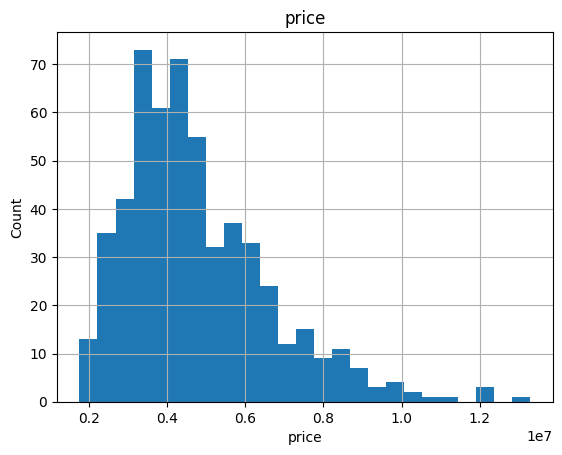

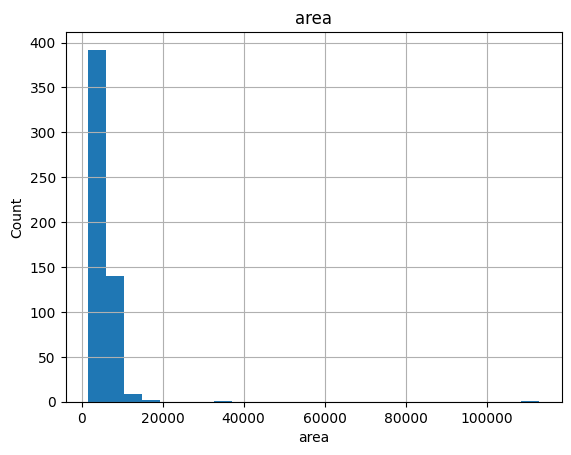

In [ ]:
## Analyze the distribution of continuous variables using histograms

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

We can observe the shape of the distribution, including whether it's skewed to the left or right, indicating where most properties are priced.


For 'price' -  the histogram is positively skewed (tail on the right), it means that most properties have lower prices, with a few very expensive properties.

For 'area' - the histogram is right-skewed, it indicates that most properties have smaller areas, with a few having significantly larger areas.

**Logarithmic transformation** is a mathematical operation that involves taking the logarithm of a variable. It is often used to transform data that is heavily skewed or has a wide range of values.

Continuous variables like "price" and "area" exhibit a right-skewed or positively skewed distribution, where a significant number of data points are clustered at lower values, and a few data points have very high values. Logarithmic transformation can help in reducing the skewness, making the data more symmetric and closer to a normal distribution.

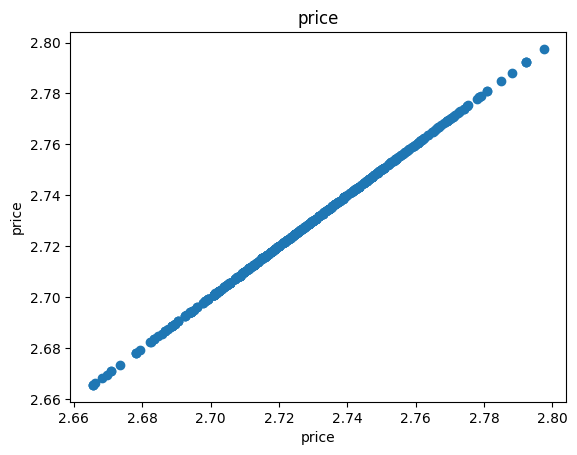

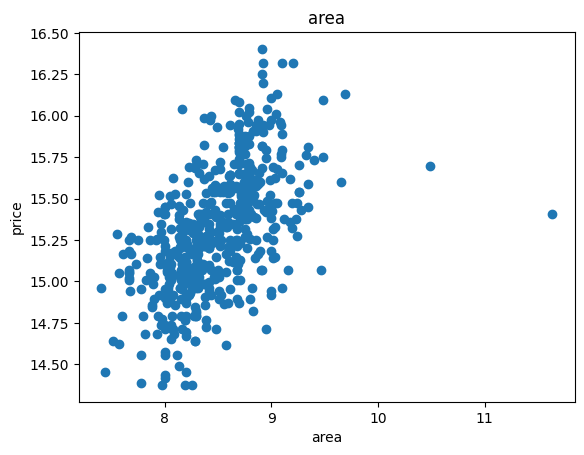

In [ ]:
## Apply logarithmic transformation to continuous variables

for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['price']=np.log(data['price'])
        plt.scatter(data[feature],data['price'])
        plt.xlabel(feature)
        plt.ylabel('price')
        plt.title(feature)
        plt.show()

##Outliers

An **outlier** is an observation in a dataset that significantly deviates from the rest of the data points. Outliers can be unusually high or low values in comparison to the majority of the data

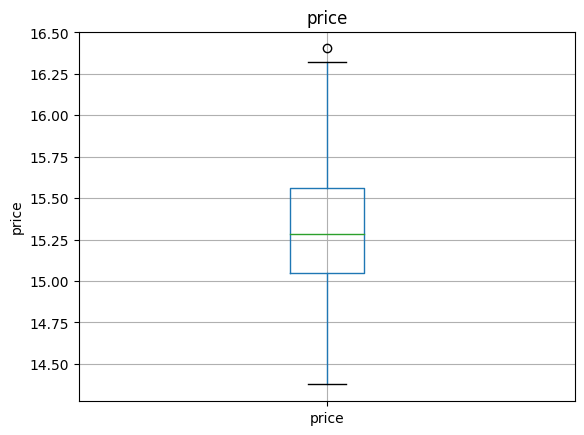

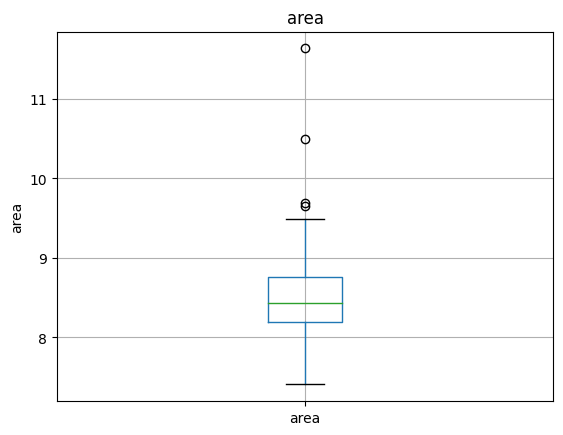

In [ ]:
# Display boxplots for transformed continuous variables

for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

##Identify Categorical Variables

In [ ]:
# List of categorical variables

categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [ ]:
dataset[categorical_features].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


In [ ]:
# Explore the unique values of categorical variables

for feature in categorical_features:
    print('{} - {} - {}'.format(feature,len(dataset[feature].unique()),dataset[feature].unique()))

mainroad - 3 - ['yes' 'no' nan]
guestroom - 2 - ['no' 'yes']
basement - 3 - ['no' 'yes' nan]
hotwaterheating - 2 - ['no' 'yes']
airconditioning - 2 - ['yes' 'no']
prefarea - 2 - ['yes' 'no']
furnishingstatus - 4 - ['furnished' 'semi-furnished' 'unfurnished' nan]


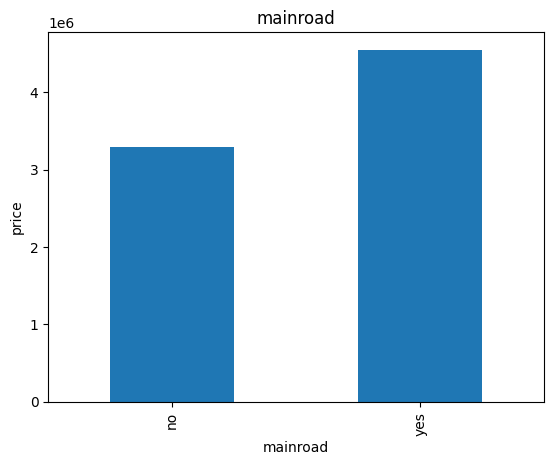

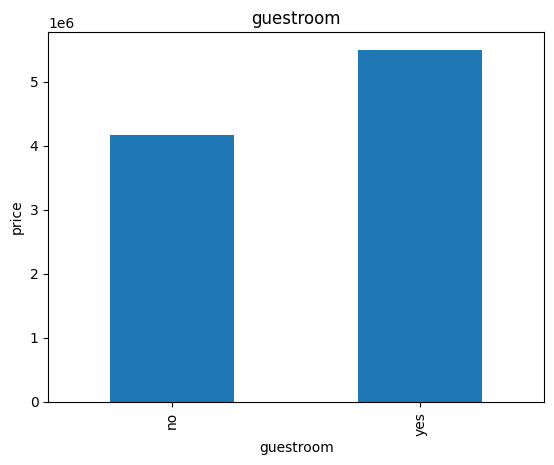

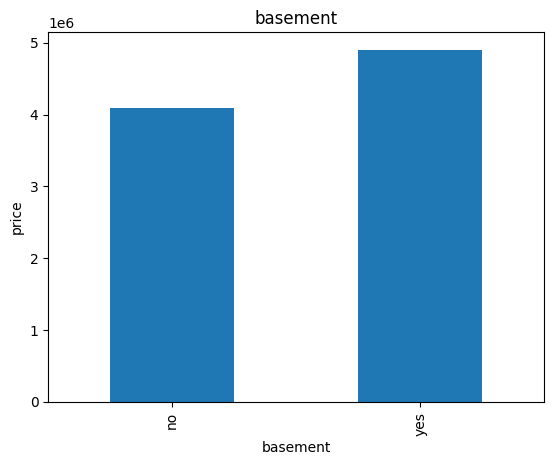

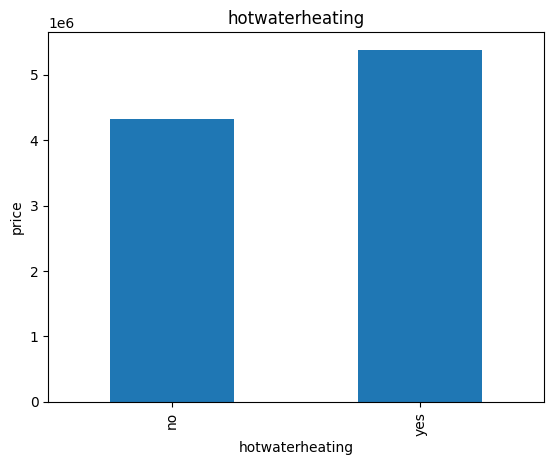

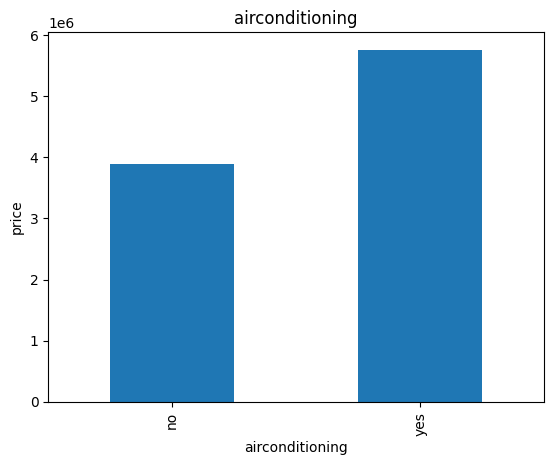

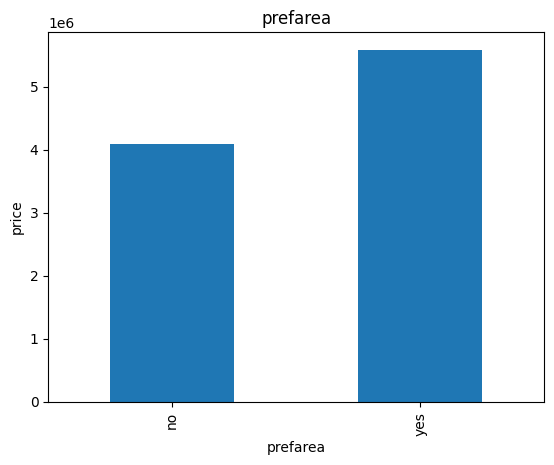

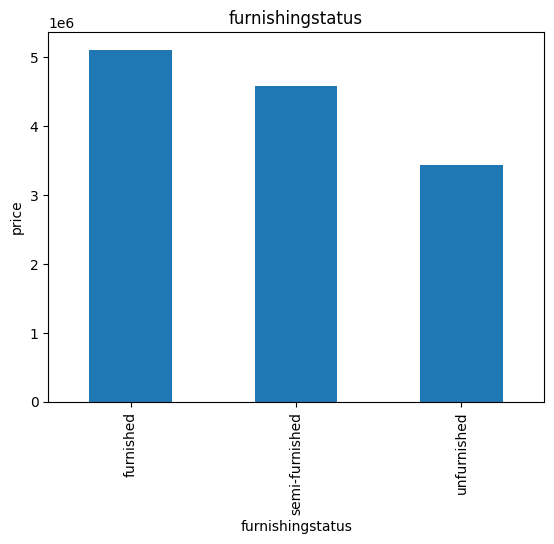

In [ ]:
## Analyze the Relationship between Categorical Variables and price

for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

# Feature Engineering

##Handling Missing Categorical Features

In [ ]:
## Identify categorical features with missing values
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>0 and dataset[feature].dtypes=='O']

# Print the percentage of missing values for each categorical feature.
for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

mainroad: 0.0018% missing values
basement: 0.0018% missing values
furnishingstatus: 0.0018% missing values


In [ ]:
## Replace missing values in categorical features with a new label 'M'.
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('M')
    return data

dataset=replace_cat_feature(dataset,features_nan)

# Check if there are any missing values remaining in categorical features.
dataset[features_nan].isnull().sum()

mainroad            0
basement            0
furnishingstatus    0
dtype: int64

By assigning a specific label to missing values, we retain the information that data was initially absent. This approach ensures that no data points are removed or lost during preprocessing. Removing rows with missing values might result in a significant loss of valuable data.

##Handling Missing Numerical Features

In [ ]:
## Identify numerical features with missing values.
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

# Print the numerical features with missing values and the percentage of missing values.
for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

bedrooms: 0.0037% missing value
bathrooms: 0.0055% missing value
parking: 0.0092% missing value


In [ ]:
## Replacing Missing Numerical Values

for feature in numerical_with_nan:
    # Replace missing values with the median since there might be outliers.
    median_value=dataset[feature].median()

    # Create a new feature to indicate missing values (1 for missing, 0 for not missing).
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)

    # Fill missing values with the median.
    dataset[feature].fillna(median_value,inplace=True)

# Verify if there are any remaining missing values in numerical features.
dataset[numerical_with_nan].isnull().sum()

bedrooms     0
bathrooms    0
parking      0
dtype: int64

In [ ]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,YearSold,YearBuilt,bedroomsnan,bathroomsnan,parkingnan
0,13300000,7420,4.0,2.0,3,yes,no,no,no,yes,2.0,yes,furnished,2010,2003,0,0,0
1,12250000,8960,4.0,4.0,4,yes,no,no,no,yes,3.0,no,furnished,2010,2004,0,0,0
2,12250000,9960,3.0,2.0,2,yes,no,yes,no,no,2.0,yes,semi-furnished,2010,2007,0,0,0
3,12215000,7500,4.0,2.0,2,yes,no,yes,no,yes,3.0,yes,furnished,2010,2002,0,0,0
4,11410000,7420,4.0,1.0,1,yes,yes,yes,no,yes,2.0,no,furnished,2010,2002,0,0,0


Similar to the categorical features, creating a new indicator feature (like 'feature+nan') helps retain the information about whether the data was initially missing. This approach ensures that no data points are removed or lost during preprocessing.

##Feature Transformation

involves converting or modifying existing features into a new format that captures relevant information

In [ ]:
## Transform the 'YearBuilt' feature to capture the age of the property.

dataset['YearBuilt']=dataset['YearSold']-dataset['YearBuilt']

Converting 'YearBuilt' to the age of the property can be more meaningful for modeling, as the age may have a different impact on price than the year built.


In [ ]:
dataset.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,YearSold,YearBuilt,bedroomsnan,bathroomsnan,parkingnan
540,1820000,3000,2.0,1.0,1,yes,no,yes,no,no,2.0,no,unfurnished,2008,94,0,0,0
541,1767150,2400,3.0,1.0,1,no,no,no,no,no,0.0,no,semi-furnished,2008,95,0,0,0
542,1750000,3620,2.0,1.0,1,yes,no,no,no,no,0.0,no,unfurnished,2008,109,0,0,0
543,1750000,2910,3.0,1.0,1,no,no,no,no,no,0.0,no,furnished,2008,116,0,0,0
544,1750000,3850,3.0,1.0,2,yes,no,no,no,no,0.0,no,unfurnished,2008,113,1,0,0


##Logarithmic Transformation of Continuous Features

In [ ]:
# Apply logarithmic transformation to continuous features ('area', 'YearBuilt').
for feature in continuous_feature:
    dataset[feature]=np.log(dataset[feature])

Logarithmic transformation helps in addressing the issue of non-linearity in continuous features and can improve the linearity between features and the target variable.

In [ ]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,YearSold,YearBuilt,bedroomsnan,bathroomsnan,parkingnan
0,16.403275,8.911934,4.0,2.0,3,yes,no,no,no,yes,2.0,yes,furnished,2010,7,0,0,0
1,16.321036,9.100526,4.0,4.0,4,yes,no,no,no,yes,3.0,no,furnished,2010,6,0,0,0
2,16.321036,9.206332,3.0,2.0,2,yes,no,yes,no,no,2.0,yes,semi-furnished,2010,3,0,0,0
3,16.318175,8.922658,4.0,2.0,2,yes,no,yes,no,yes,3.0,yes,furnished,2010,8,0,0,0
4,16.250001,8.911934,4.0,1.0,1,yes,yes,yes,no,yes,2.0,no,furnished,2010,8,0,0,0


##Handling Categorical Features

In [ ]:
# Reduce the cardinality of categorical features by replacing rare labels with 'RareVar'.
for feature in categorical_features:
    temp=dataset.groupby(feature)['price'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'RareVar')

Reducing the cardinality of categorical features helps prevent overfitting and ensures that the model is not overwhelmed by rare labels.

In [ ]:
dataset.head(100)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,YearSold,YearBuilt,bedroomsnan,bathroomsnan,parkingnan
0,16.403275,8.911934,4.0,2.0,3,yes,no,no,no,yes,2.0,yes,furnished,2010,7,0,0,0
1,16.321036,9.100526,4.0,4.0,4,yes,no,no,no,yes,3.0,no,furnished,2010,6,0,0,0
2,16.321036,9.206332,3.0,2.0,2,yes,no,yes,no,no,2.0,yes,semi-furnished,2010,3,0,0,0
3,16.318175,8.922658,4.0,2.0,2,yes,no,yes,no,yes,3.0,yes,furnished,2010,8,0,0,0
4,16.250001,8.911934,4.0,1.0,1,yes,yes,yes,no,yes,2.0,no,furnished,2010,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,15.656060,8.318742,3.0,2.0,3,yes,no,no,no,yes,2.0,no,semi-furnished,2010,50,0,0,0
96,15.656060,9.104980,3.0,1.0,1,yes,no,yes,no,no,1.0,yes,furnished,2010,48,0,0,0
97,15.656060,8.764053,3.0,1.0,1,yes,yes,yes,no,yes,1.0,yes,semi-furnished,2010,47,0,0,0
98,15.654948,8.794825,3.0,2.0,3,yes,no,no,no,yes,0.0,yes,unfurnished,2010,46,0,0,0


##Label Encoding of Categorical Features

In [ ]:
## Label encode categorical features to convert them into numerical format.

for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [ ]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,YearSold,YearBuilt,bedroomsnan,bathroomsnan,parkingnan
0,16.403275,8.911934,4.0,2.0,3,2,0,1,0,1,2.0,1,3,2010,7,0,0,0
1,16.321036,9.100526,4.0,4.0,4,2,0,1,0,1,3.0,0,3,2010,6,0,0,0
2,16.321036,9.206332,3.0,2.0,2,2,0,2,0,0,2.0,1,2,2010,3,0,0,0
3,16.318175,8.922658,4.0,2.0,2,2,0,2,0,1,3.0,1,3,2010,8,0,0,0
4,16.250001,8.911934,4.0,1.0,1,2,1,2,0,1,2.0,0,3,2010,8,0,0,0


Label encoding transforms categorical features into a numerical format, which can be used as input for machine learning models.

##Feature Scaling

In [ ]:
## Scale the numerical features using Min-Max scaling.

scaling_feature=[feature for feature in dataset.columns if feature not in ['price'] ]
len(scaling_feature)

17

In [ ]:
scaling_feature

['area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus',
 'YearSold',
 'YearBuilt',
 'bedroomsnan',
 'bathroomsnan',
 'parkingnan']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[scaling_feature])

MinMaxScaler()

In [ ]:
scaler.transform(dataset[scaling_feature])

array([[0.35577398, 0.5       , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.40040326, 0.5       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.42544199, 0.33333333, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.1859322 , 0.16666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13426749, 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.20050936, 0.33333333, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
# Create a new DataFrame with scaled features.

data = pd.concat([dataset[['price']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[scaling_feature]), columns=scaling_feature)],
                    axis=1)

Scaling the features ensures that all features have the same scale and avoids certain features dominating the model based on their magnitude.

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,YearSold,YearBuilt,bedroomsnan,bathroomsnan,parkingnan
0,16.403275,0.355774,0.500000,0.333333,0.666667,1.0,0.0,0.5,0.0,1.0,0.666667,1.0,1.000000,1.0,0.052174,0.0,0.0,0.0
1,16.321036,0.400403,0.500000,1.000000,1.000000,1.0,0.0,0.5,0.0,1.0,1.000000,0.0,1.000000,1.0,0.043478,0.0,0.0,0.0
2,16.321036,0.425442,0.333333,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.666667,1.0,0.017391,0.0,0.0,0.0
3,16.318175,0.358312,0.500000,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,1.000000,1.0,0.060870,0.0,0.0,0.0
4,16.250001,0.355774,0.500000,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,1.000000,1.0,0.060870,0.0,0.0,0.0


##Save the Final Dataset

In [ ]:
# Save the preprocessed dataset to a CSV file.

data.to_csv('/content/Housing_final.csv',index=False)

#Feature Selection

 process of choosing a subset of the most relevant and informative features from a larger set of available features in a dataset. The objective of feature selection is to improve the performance of machine learning models.

In [ ]:
## The main aim is to select the most relevant features for the model

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
dataset=pd.read_csv('/content/Housing_final.csv')

In [ ]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,YearSold,YearBuilt,bedroomsnan,bathroomsnan,parkingnan
0,16.403275,0.355774,0.500000,0.333333,0.666667,1.0,0.0,0.5,0.0,1.0,0.666667,1.0,1.000000,1.0,0.052174,0.0,0.0,0.0
1,16.321036,0.400403,0.500000,1.000000,1.000000,1.0,0.0,0.5,0.0,1.0,1.000000,0.0,1.000000,1.0,0.043478,0.0,0.0,0.0
2,16.321036,0.425442,0.333333,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.666667,1.0,0.017391,0.0,0.0,0.0
3,16.318175,0.358312,0.500000,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,1.000000,1.0,0.060870,0.0,0.0,0.0
4,16.250001,0.355774,0.500000,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,1.000000,1.0,0.060870,0.0,0.0,0.0


In [ ]:
# Capture the dependent feature (target variable).
y_train=dataset[['price']]

In [ ]:
# Drop the dependent feature from the dataset to create the feature matrix.
X_train=dataset.drop(['price'],axis=1)

##Applying Feature Selection using Lasso Regression

L1 penalty encourages the model to reduce the coefficients of less important features to zero. In other words, Lasso regression automatically performs feature selection by excluding irrelevant or redundant features from the model. This property makes Lasso particularly effective when you have high-dimensional datasets.


In [ ]:
# First, specify the Lasso Regression model and choose an appropriate alpha (penalty parameter).
# Higher alpha values lead to fewer selected features.

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))

# Fit the model to the data to select the features with non-zero coefficients.
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
# Get a boolean mask indicating which features are selected.
feature_sel_model.get_support()

array([False, False,  True,  True, False, False, False, False,  True,
        True,  True,  True,  True,  True, False, False, False])

In [ ]:
# Let's print the number of total and selected features.
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 17
selected features: 8
features with coefficients shrank to zero: 9


Feature selection using Lasso Regression helps to identify the most relevant features by setting coefficients of less important features to zero.

In [ ]:
selected_feat

Index(['bathrooms', 'stories', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'YearSold', 'YearBuilt'],
      dtype='object')

In [ ]:
# Create a list of selected features.
X_train=X_train[selected_feat]

In [ ]:
X_train.head()

,bathrooms,stories,airconditioning,parking,prefarea,furnishingstatus,YearSold,YearBuilt
0,0.333333,0.666667,1.0,0.666667,1.0,1.000000,1.0,0.052174
1,1.000000,1.000000,1.0,1.000000,0.0,1.000000,1.0,0.043478
2,0.333333,0.333333,0.0,0.666667,1.0,0.666667,1.0,0.017391
3,0.333333,0.333333,1.0,1.000000,1.0,1.000000,1.0,0.060870
4,0.000000,0.000000,1.0,0.666667,0.0,1.000000,1.0,0.060870


#Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Split the data into training and testing sets using k-fold cross-validation.

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

###Random Forest

In [ ]:
# Initialize the Random Forest Regressor model.
model1 = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Train the model on the training data.
model1.fit(X_train, y_train)

<ipython-input-61-8fe592c8779e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the testing data.
y_pred = model1.predict(X_test)

In [ ]:
# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Print the evaluation metrics.
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print('R-squared (R2) Score:', r2)

Mean Squared Error:  0.012554747275707464
Mean Absolute Error:  0.08163403111880611
R-squared (R2) Score: 0.9349793895649354


###Linear Regression

In [ ]:
# Initialize the Linear Regression model.
model2 = LinearRegression()

In [ ]:
# Train the model on the training data.
model2.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test data.
y_pred2 = model2.predict(X_test)

In [ ]:
# Calculate the evaluation metrics
mse2 = mean_squared_error(y_test, y_pred2)
mae2 = mean_absolute_error(y_test, y_pred2)
r22 = r2_score(y_test, y_pred2)

In [ ]:
# Print the evaluation metrics.
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print('R-squared (R2) Score:', r2)

Mean Squared Error:  0.012554747275707464
Mean Absolute Error:  0.08163403111880611
R-squared (R2) Score: 0.9349793895649354


MSE - measures the average squared difference between predicted values and actual values.
A lower MSE indicates that the model's predictions are closer to the actual values

MAE tells - average absolute difference between predicted and actual values
It provides a more intuitive understanding of the model's prediction errors, where a lower MAE indicates better performance

R2 Score - measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features).
An R-squared score of 0.7 means that approximately 70% of the variance in the target variable can be explained by the features in the model.